Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


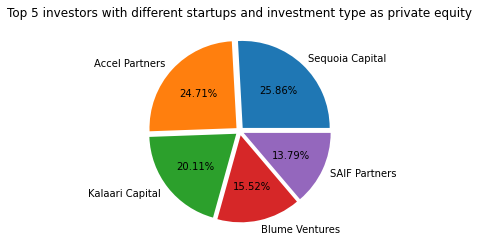

In [4]:
# problem 5:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_data=pd.read_csv("startup_funding.csv",encoding="utf-8")
df=file_data.copy()

# removing all sorts of undiclosed investors

df.dropna(subset=["InvestorsName"],inplace=True)
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investor"]
df=df[df.InvestorsName!="Undisclosed investor"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed"]
def func1(name):
    return name.split(",")
df.InvestorsName=df.InvestorsName.apply(func1)

# correcting the names of startup
df.dropna(subset=["StartupName"],inplace=True)
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("olacabs","Ola",inplace=True)
df.StartupName.replace("ola","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

# investment type correction
df.dropna(subset=["InvestmentType"],inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)

# getting only rows with investment type as Private equity
df=df[(df.InvestmentType=="Private Equity")] 

inv=np.array(df.InvestorsName)
stname=np.array(df.StartupName)
check={}
i_a={}

for i in range(len(inv)):
    for j in range(len(inv[i])):

    # using strip to get rid of spaces
        element=inv[i][j].strip() 
        if element!="":
                # checking if the startup name & investor name pair is already present in the dictionary or not

            if not((stname[i]+element) in check.keys()): 
                i_a[element]=i_a.get(element,0)+1
                check[stname[i]+element]=1
                
d=pd.DataFrame(list(i_a.values()),list(i_a.keys()))
d=d.sort_values(by=[0],ascending=False)
for i in range(5):
    print(d.index[i],d[0][i])
count=np.array(d[0:5].values).ravel()
inv_name=np.array(d[0:5].index).ravel()
e=[0.05,0.05,0.05,0.05,0.05]
plt.pie(count,labels=inv_name,autopct="%.2f%%",explode=e)
plt.title("Top 5 investors with different startups and investment type as private equity")
plt.show()